In [10]:
import os
import sys
from pathlib import Path

import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt

from src.utils import setup_dirs

sys.path.insert(0, "..")

In [4]:
root_dir = Path(os.getcwd()).parent
data_dir, log_dir, root_out_dir = setup_dirs(root_dir)
data_dir = data_dir / "EMIDEC" / "emidec-dataset-1.0.1"

patients = sorted([Path(d) for d in data_dir.iterdir() if d.is_dir()])

(148, 244, 9) (148, 244, 9)


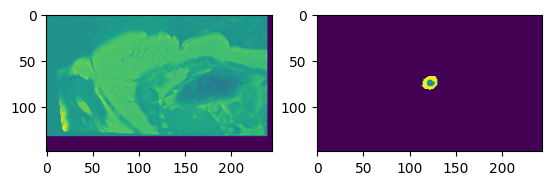

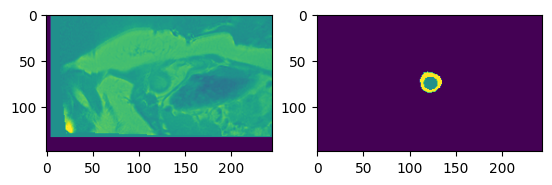

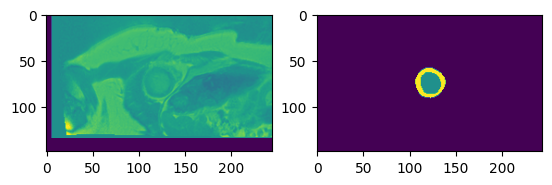

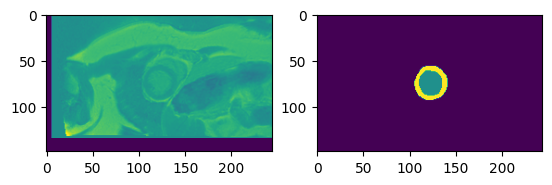

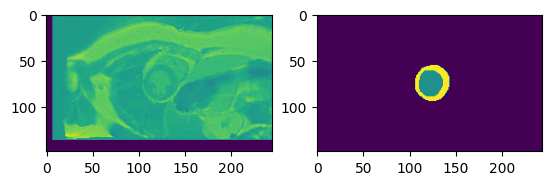

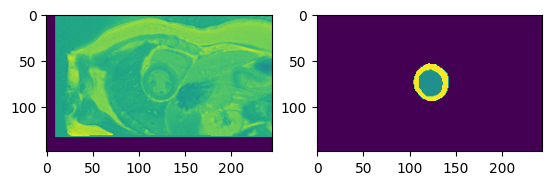

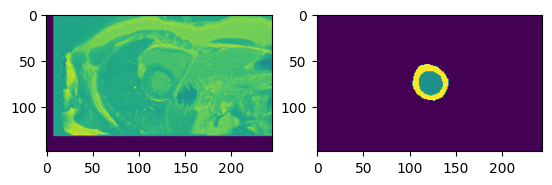

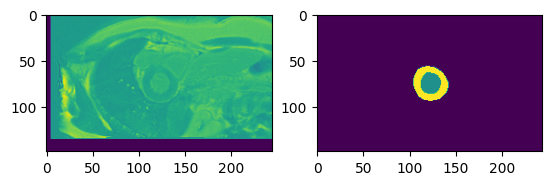

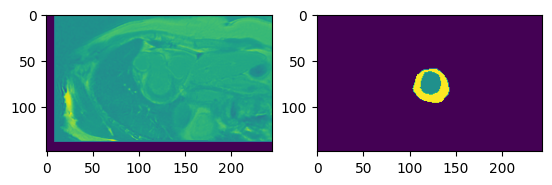

In [11]:
patient = patients[0]
image = nib.load(patient / "Images" / f"{patient.name}.nii.gz")
label = nib.load(patient / "Contours" / f"{patient.name}.nii.gz")

image = image.get_fdata(dtype=np.float32)
label = label.get_fdata(dtype=np.float32)

print(image.shape, label.shape)
_, _, slices = image.shape
for i in range(slices):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(image[..., i])
    plt.subplot(1, 2, 2)
    plt.imshow(label[..., i])

plt.show()



In [18]:
unique_labels = set()
for patient in patients:
    label = nib.load(patient / "Contours" / f"{patient.name}.nii.gz")
    label = label.get_fdata(dtype=np.float32)
    unique_labels.update(np.unique(label))

# background (0), cavity(1), normal myocardium (2), myocardial infarction (3) and no-reflow (4)
print(unique_labels)

{0.0, 1.0, 2.0, 3.0, 4.0}
